# **Imports**

In [ ]:
# imports
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [1]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
  # from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Data**

In [2]:
path = "/content/drive/MyDrive/ColabNotebooks/DataSet_dae_proj.csv"
data_ds = pd.read_csv(path)
data_ds.head()

,Country,TotalArea,LandArea,WaterArea,Highest.point,Maximum.elevation,Lowest.point,Minimum.elevation,Pop2023
0,Tuvalu,26.0,26.0,0.0,Unnamed location on Niulakita,5.0,South Pacific Ocean,0.0,11396
1,Marshall Islands,181.0,181.0,11673.0,Unnamed location on Likiep,10.0,North Pacific Ocean,0.0,41996
2,Bahamas,13943.0,10010.0,3870.0,Mount Alvernia on Cat Island,63.0,North Atlantic Ocean,0.0,412624
3,Gambia,11295.0,10000.0,1295.0,Unnamed point,64.0,North Atlantic Ocean,0.0,2773168
4,Nauru,21.0,21.0,0.0,Command Ridge,65.0,South Pacific Ocean,0.0,1278


In [3]:
y = data_ds['Maximum.elevation']

x1 = data_ds['TotalArea']
x2 = data_ds['Minimum.elevation']
x3 = data_ds['WaterArea']
x4 = data_ds['Pop2023']

### **Data Analysis**

X1: Total Area

In [ ]:
x1.describe()

count    1.720000e+02
mean     5.879122e+05
std      1.693194e+06
min      2.020000e+00
25%      2.097325e+04
50%      1.195120e+05
75%      4.943550e+05
max      1.709825e+07
Name: TotalArea, dtype: float64

(-100.0, 10006000.0)

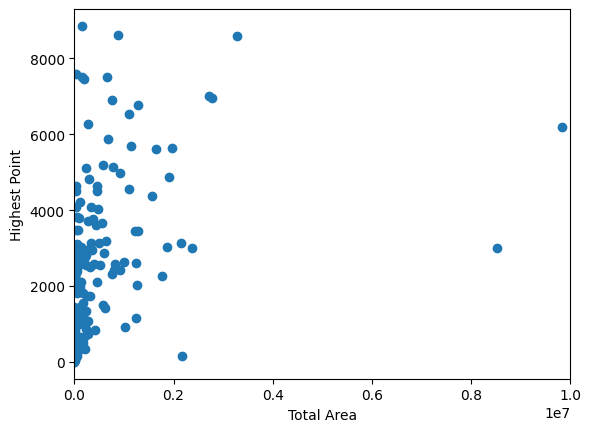

In [ ]:
# Highest point vs Total Area
plt.scatter(x1, y)
plt.xlabel("Total Area")
plt.ylabel("Highest Point")

plt.xlim(-100, 10006000)

X2: Minimum Elevation (Lowest Point)

In [ ]:
x2.describe()

count     172.000000
mean       47.251744
std       195.211659
min      -428.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1400.000000
Name: Minimum.elevation, dtype: float64

(-600.0, 1600.0)

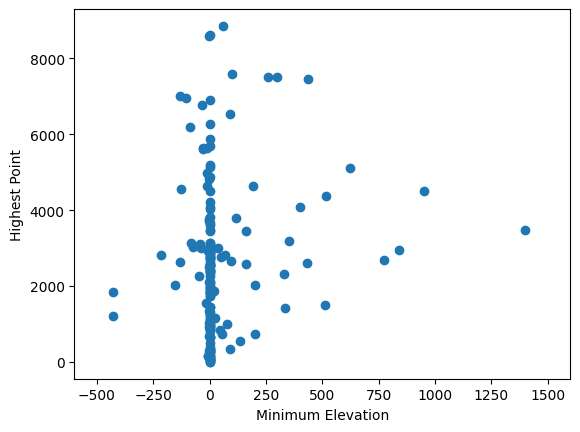

In [ ]:
# Highest point vs Lowest point
plt.scatter(x2, y)
plt.xlabel("Minimum Elevation")
plt.ylabel("Highest Point")

plt.xlim(-600, 1600)

X3: Water Area

In [ ]:
x3.describe()

count       172.000000
mean      18207.910285
std       80523.684714
min           0.000000
25%           0.000000
50%        1330.000000
75%        8275.000000
max      719836.000000
Name: WaterArea, dtype: float64

(-600.0, 75000.0)

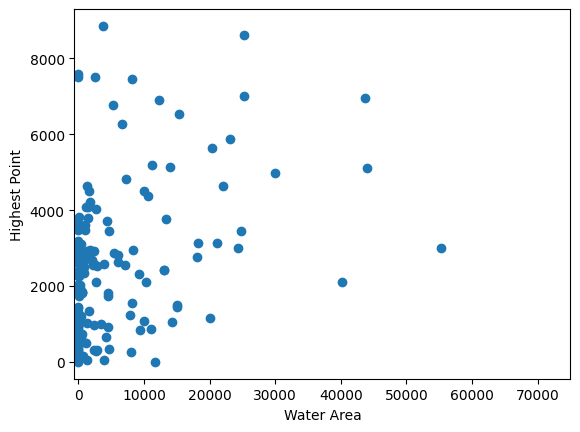

In [ ]:
plt.scatter(x3, y)
plt.xlabel("Water Area")
plt.ylabel("Highest Point")

plt.xlim(-600, 75000)

X4: Population (2023)

In [ ]:
print(x4.describe())
# print(x4.isnull.sum())

count    1.720000e+02
mean     3.520083e+07
std      1.184819e+08
min      1.278000e+03
25%      1.669738e+06
50%      8.793880e+06
75%      2.884713e+07
max      1.428628e+09
Name: Pop2023, dtype: float64


(0.0, 4000000.0)

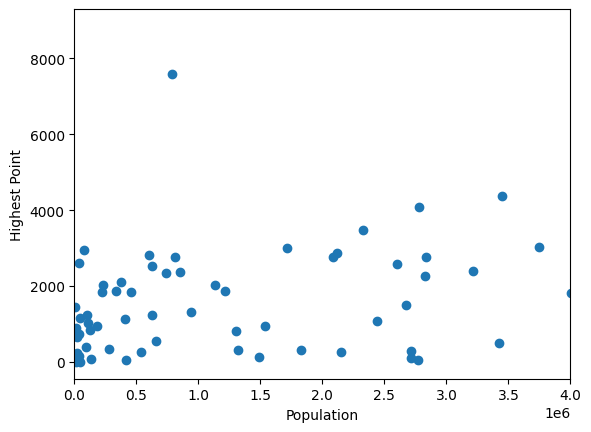

In [ ]:
plt.scatter(x4, y)
plt.xlabel("Population")
plt.ylabel("Highest Point")

plt.xlim(0, 4000000)

# ***Single Variable Regression***

### **Split dataset** 

In [34]:
# X1
x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y, test_size=0.3, random_state=23)
#X2
x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y, test_size=0.3, random_state=23)
# Water Area & Population
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.3, random_state=23)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.3, random_state=23)


In [35]:
y1_train

108    2876.0
156    5700.0
102    2772.0
58     1752.0
124    3139.0
        ...  
39      986.0
91     2592.0
31      828.0
40     1014.0
83     2419.0
Name: Maximum.elevation, Length: 120, dtype: float64

### **Training**

In [37]:
lr = LinearRegression()
# lgr = LogisticRegression(random_state=0)

X1: Total Area

Text(0, 0.5, 'Highest Point')

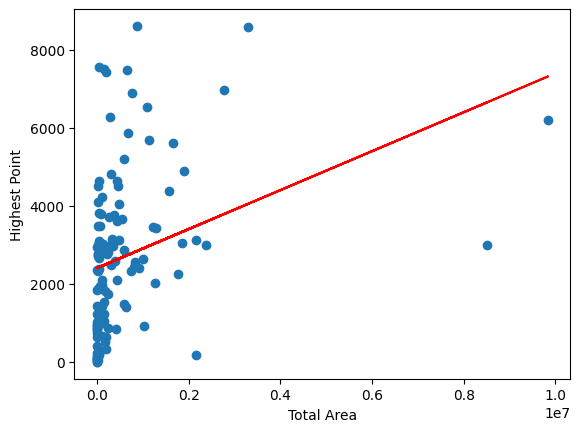

In [38]:
X = np.array(x1_train).reshape(-1,1)

# lgr.fit(X, y1_train)
lr.fit(X, y1_train)

y1_pred = lr.predict(X)
plt.plot(X, y1_pred, color='red')

# y1_pred = lgr.predict(X)
# plt.plot(X, y1_pred, color='green')

plt.scatter(X, y1_train)
plt.xlabel('Total Area')
plt.ylabel('Highest Point')

X2: Lowest Point

[1.72518845]
2599.1897403931853


Text(0, 0.5, 'Highest Point')

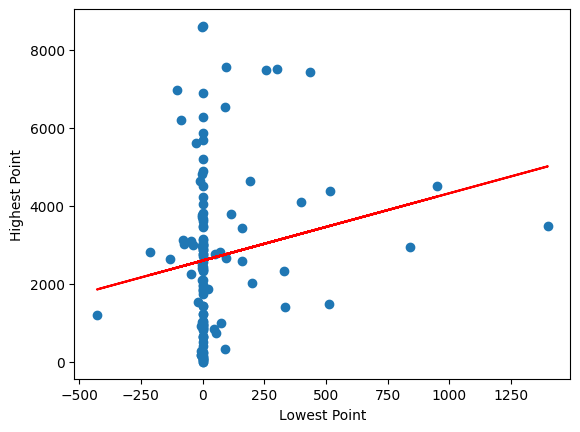

In [44]:
X = np.array(x2_train).reshape(-1,1)
lr.fit(X, y1_train)
print(lr.coef_)
print(lr.intercept_)
y2_pred = lr.predict(X)

plt.scatter(X, y1_train)
plt.plot(X, y2_pred, color='red')
plt.xlabel('Lowest Point')
plt.ylabel('Highest Point')

X3: Water Area

(-2000.0, 75000.0)

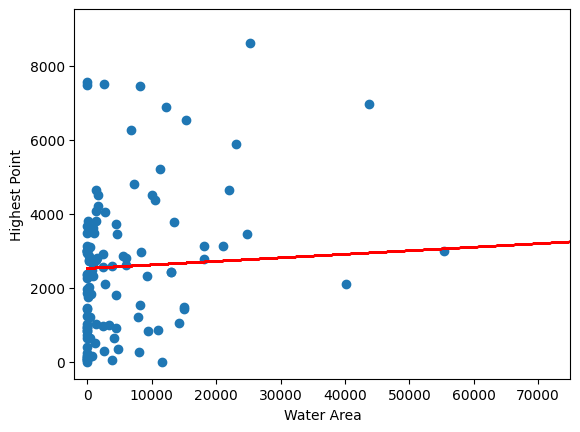

In [ ]:
X = np.array(x3_train).reshape(-1,1)
lr.fit(X, y1_train)
y3_pred = lr.predict(X)

plt.scatter(X, y1_train)
plt.plot(X, y3_pred, color='red')
plt.xlabel('Water Area')
plt.ylabel('Highest Point')

plt.xlim(-2000, 75000)

X4: Population

(0.0, 400000000.0)

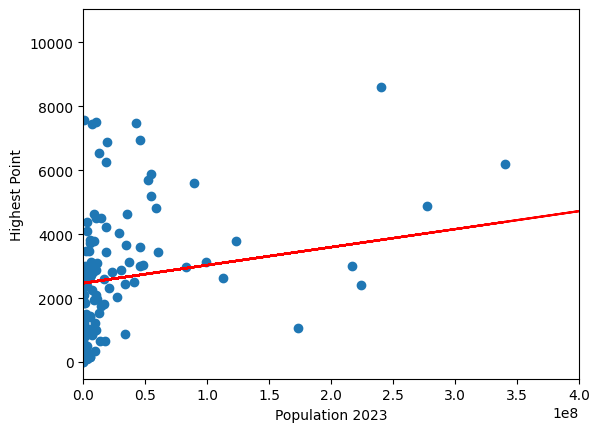

In [ ]:
X = np.array(x4_train).reshape(-1,1)
lr.fit(X, y1_train)
y4_pred = lr.predict(X)

plt.scatter(X, y1_train)
plt.plot(X, y4_pred, color='red')
plt.xlabel('Population 2023')
plt.ylabel('Highest Point')

plt.xlim(0, 400000000)

### **Evaluation**

(1500.0, 6000.0)

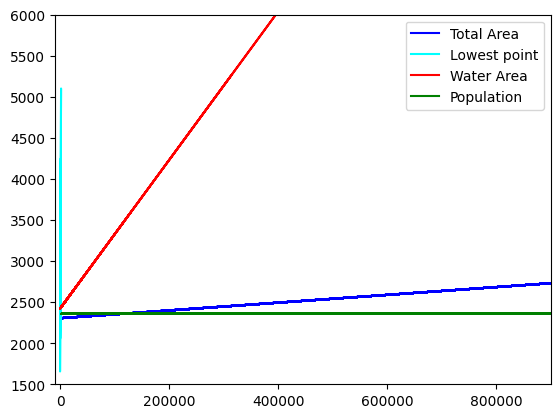

In [ ]:
plt.plot(x1_train, y1_pred, label='Total Area', color='blue')
plt.plot(x2_train, y2_pred, label='Lowest point', color='cyan')
plt.plot(x3_train, y3_pred, label='Water Area', color='red')
plt.plot(x4_train, y4_pred, label='Population', color='green')

plt.legend()
plt.xlim(-10000, 900009)
plt.ylim(1500, 6000)

--- Total Area

In [43]:
print(y1_train.describe())
mse = mean_squared_error(y1_train, y1_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y1_train, y1_pred)
print("R2 score:", r2)

count     120.000000
mean     2691.779167
std      2048.643924
min         5.000000
25%      1007.000000
50%      2536.000000
75%      3624.750000
max      8611.000000
Name: Maximum.elevation, dtype: float64
MSE: 3749783.118627857
R2 score: 0.0990359251414965


In [40]:
print(y1_val.describe())

X = np.array(x1_val).reshape(-1,1)
y1_pred_test = lr.predict(X)
mse = mean_squared_error(y1_val, y1_pred_test)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y1_val, y1_pred_test)
print("R2 score:", r2)

count      52.000000
mean     2550.134615
std      1909.335384
min        64.000000
25%      1155.750000
50%      2390.000000
75%      2966.000000
max      8848.000000
Name: Maximum.elevation, dtype: float64
MSE: 3430094.372713267
R2 score: 0.04065504845401513


--- Lowest Point

In [45]:
print(y2_train.describe())
mse = mean_squared_error(y2_train, y2_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y2_train, y2_pred)
print("R2 score:", r2)

count     120.000000
mean     2691.779167
std      2048.643924
min         5.000000
25%      1007.000000
50%      2536.000000
75%      3624.750000
max      8611.000000
Name: Maximum.elevation, dtype: float64
MSE: 4038943.604135685
R2 score: 0.029559051127906022


In [46]:
print(y2_val.describe())

X = np.array(x2_val).reshape(-1,1)
y2_pred_test = lr.predict(X)
mse = mean_squared_error(y2_val, y2_pred_test)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y2_val, y2_pred_test)
print("R2 score:", r2)

count      52.000000
mean     2550.134615
std      1909.335384
min        64.000000
25%      1155.750000
50%      2390.000000
75%      2966.000000
max      8848.000000
Name: Maximum.elevation, dtype: float64
MSE: 3613053.8713226574
R2 score: -0.010515925943830107


--- Water Area

In [ ]:
print(y3_train.describe())
mse = mean_squared_error(y3_train, y3_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y3_train, y3_pred)
print("R2 score:", r2)

count     120.000000
mean     2691.779167
std      2048.643924
min         5.000000
25%      1007.000000
50%      2536.000000
75%      3624.750000
max      8611.000000
Name: Maximum.elevation, dtype: float64
MSE: 3709864.851031907
R2 score: 0.1086271265248181


--- Population (2023)

In [ ]:
print(y4_train.describe())
mse = mean_squared_error(y4_train, y4_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y4_train, y4_pred)
print("R2 score:", r2)

count     120.000000
mean     2691.779167
std      2048.643924
min         5.000000
25%      1007.000000
50%      2536.000000
75%      3624.750000
max      8611.000000
Name: Maximum.elevation, dtype: float64
MSE: 3546939.053142722
R2 score: 0.14777346809230774


Mimimum Elevation (Lowest Point) has the lowest R2 score, therefore Maximum Elevation is most likely not linearly dependent on this factor.
The Total Area has a higher R2 score and therefore a better model between the two.

Suprisingly, Water Area and Population seem to have better correlation with the Maximum Elevation. These models produce relatively bad models (very low R2 scores also) but are seemingly better than that of Minimum Elevation and Total Area. Population (2023) has the highest R2 score of all four factors. 

The MSE is used to try and account for outliers as it penalizes such errors heavily. 

# ***Multivariable Regression***


### **Data**

In [4]:
data_ds.head()

,Country,TotalArea,LandArea,WaterArea,Highest.point,Maximum.elevation,Lowest.point,Minimum.elevation,Pop2023
0,Tuvalu,26.0,26.0,0.0,Unnamed location on Niulakita,5.0,South Pacific Ocean,0.0,11396
1,Marshall Islands,181.0,181.0,11673.0,Unnamed location on Likiep,10.0,North Pacific Ocean,0.0,41996
2,Bahamas,13943.0,10010.0,3870.0,Mount Alvernia on Cat Island,63.0,North Atlantic Ocean,0.0,412624
3,Gambia,11295.0,10000.0,1295.0,Unnamed point,64.0,North Atlantic Ocean,0.0,2773168
4,Nauru,21.0,21.0,0.0,Command Ridge,65.0,South Pacific Ocean,0.0,1278


In [5]:
y = data_ds['Maximum.elevation']
x = data_ds.drop(columns = ['Country', 'Highest.point', 'Lowest.point', 'Maximum.elevation', 'Pop2023'])
print(y)
print(x)

0         5.0
1        10.0
2        63.0
3        64.0
4        65.0
        ...  
167    7570.0
168    8586.0
169    8611.0
170    8848.0
171    6190.5
Name: Maximum.elevation, Length: 172, dtype: float64
     TotalArea   LandArea  WaterArea  Minimum.elevation
0         26.0       26.0        0.0                0.0
1        181.0      181.0    11673.0                0.0
2      13943.0    10010.0     3870.0                0.0
3      11295.0    10000.0     1295.0                0.0
4         21.0       21.0        0.0                0.0
..         ...        ...        ...                ...
167    38394.0    38394.0        0.0               97.0
168  3287263.0  2973190.0   314073.0               -2.0
169   881913.0   856690.0    25223.0                0.0
170   147516.0   143686.0     3830.0               59.0
171  9833517.0  9147593.0   685924.0              -85.5

[172 rows x 4 columns]


### **Split Dataset**

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=21)
print(y.size)

172


### **Training**

Text(0, 0.5, 'Predicted Y')

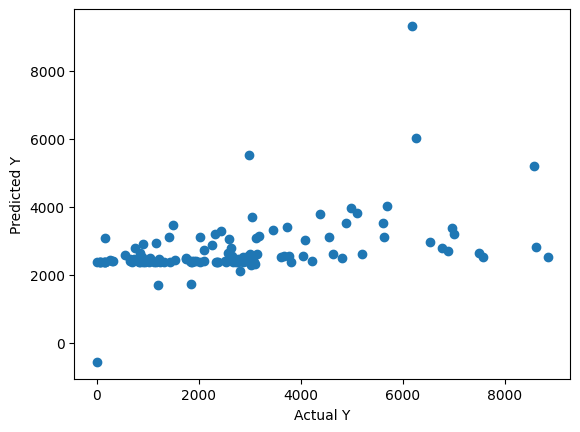

In [50]:
LR = LinearRegression()

LR.fit(x_train, y_train)
y_pred = LR.predict(x_train)

# plt.plot(x_train, y_pred)
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

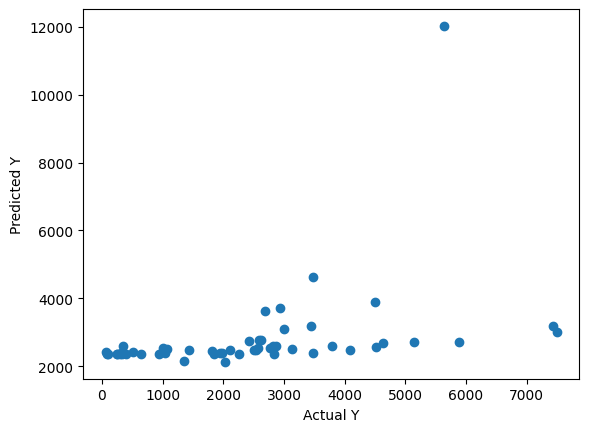

In [31]:
y_pred_test = LR.predict(x_val)

# plt.plot(x_train, y_pred)
plt.scatter(y_val, y_pred_test)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

### **Evaluation**

In [48]:
print(y_train.describe())
mse = mean_squared_error(y_train, y_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y_train, y_pred)
print("R2 score:", r2)

count     120.000000
mean     2744.562500
std      2075.487484
min         5.000000
25%      1147.250000
50%      2529.000000
75%      3624.750000
max      8848.000000
Name: Maximum.elevation, dtype: float64
MSE: 3435633.6862292592
R2 score: 0.1957317963093097


In [49]:
print(y_val.describe())
mse = mean_squared_error(y_val, y_pred_test)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_test)
print("R2 score:", r2)

count      52.000000
mean     2428.326923
std      1824.932830
min        63.000000
25%       995.500000
50%      2459.000000
75%      3215.500000
max      7492.000000
Name: Maximum.elevation, dtype: float64
MSE: 3392613.491943538
R2 score: -0.03866090338159833


*Negative R2 score  :=  Really bad model*